# Sentiment analysis

This notebook identifies the sentiment of headlines

## Imports

In [44]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

## Setup

In [31]:
# Don't truncate text in columns

pd.set_option("max_colwidth", 0)

## Data sourcing

In [2]:
headlines = pd.read_csv("./data/processed_headlines.csv")

## Sentiment analysis

In [3]:
# Make an analyser

vader = SentimentIntensityAnalyzer()

In [23]:
# Apply the analyser to the dataframe

headlines["sentiment_score"] = headlines["title"].apply(lambda x: vader.polarity_scores(x)["compound"])

In [37]:
headlines["sentiment_category"] = headlines["sentiment_score"].apply(lambda score: "neutral"
                                                                     if -0.4 < score < 0.4
                                                                     else 'negative'
                                                                     if score < 0
                                                                     else 'positive')

In [35]:
headlines.groupby("source")["sentiment_score"].mean()

source
BBC          -0.053292
Daily Mail   -0.221979
Name: sentiment_score, dtype: float64

In [34]:
headlines.sort_values('sentiment_score')[["title", "sentiment_score", "source"]].tail(10)

,title,sentiment_score,source
79,PROFESSOR FRANK FUREDI: The new obsession of museums to wage war on the past means they're not doing their most basic job - caring for our greatest treasures,0.6326,Daily Mail
95,Moment woman chained to the floor of a Kentucky home like a dog is freed by axe-wielding cops,0.6369,Daily Mail
54,SARAH SANDS: How the rescue of Peggy the short-sighted hedgehog brought such solace in my beloved father's last days,0.6597,Daily Mail
41,PETER HITCHENS: We need a serious debate about the death penalty - but not while our criminal justice system is a shuddering jalopy quite unfit for its job,0.6872,Daily Mail
2,"Yevgeny Prigozhin was assassinated 'as a gift for Zelensky to celebrate Ukraine's victory day today', Putin's former spokesman claims",0.7650,Daily Mail
145,World Championships 2023: Josh Kerr 'throws 16 years in the sport at the final 200m' to become 1500m champion,0.7964,BBC
126,World Championships 2023: Katie Moon and Nina Kennedy share pole vault gold medal in Budapest,0.8176,BBC
90,Making a splash! Queen Silvia of Sweden stuns in a beautiful blue dress as she joins King Carl Gustaf at the Stockholm Water Prize ceremony,0.8221,Daily Mail
12,Orphaned rescue deer becomes best friends with toddler who spends hours playing with him,0.9081,Daily Mail
147,World Athletics Championships 2023: Great Britain's Josh Kerr wins stunning 1500m gold,0.9274,BBC


In [39]:
headlines[["title", "sentiment_category"]][headlines["sentiment_category"] == "positive"]

,title,sentiment_category
2,"Yevgeny Prigozhin was assassinated 'as a gift for Zelensky to celebrate Ukraine's victory day today', Putin's former spokesman claims",positive
9,"Jamie Oliver shares a supportive message to children who have dyslexia as they receive their GCSE results, saying: 'The education system doesn't play to their strengths'",positive
12,Orphaned rescue deer becomes best friends with toddler who spends hours playing with him,positive
18,How Lady Amelia Windsor uses her growing platform to promote sustainable living,positive
19,Full list of GCSE results day free food and deals for students from Nando's to Frankie & Benny's,positive
37,EPHRAIM HARDCASTLE: Chris Patten is set to open up on his time as the last governor of Hong Kong at a literature festival as he saves his 'most withering comments' for Sinophile diplomats in London,positive
41,PETER HITCHENS: We need a serious debate about the death penalty - but not while our criminal justice system is a shuddering jalopy quite unfit for its job,positive
49,Fundraiser is launched to appeal Lucy Letby's conviction for murdering babies - as campaigner claims trial 'may represent one of the greatest miscarriages of justice ever',positive
54,SARAH SANDS: How the rescue of Peggy the short-sighted hedgehog brought such solace in my beloved father's last days,positive
58,Kemi Badenoch hails the UK's 'thriving relationship' with India as talks progress for a major new trade deal,positive


In [41]:
vader.polarity_scores("pass grades fail")

{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423}

<Axes: xlabel='sentiment_category', ylabel='count'>

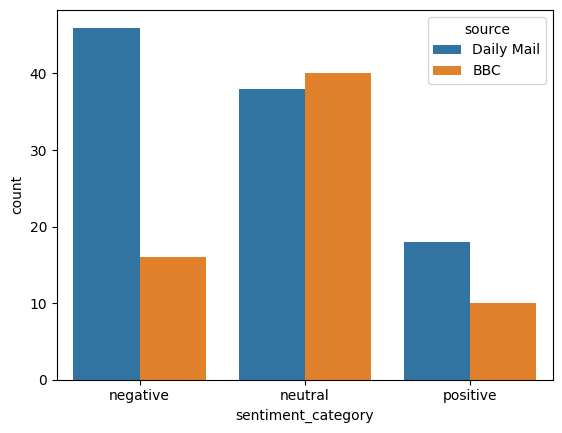

In [47]:
sns.countplot(headlines, x="sentiment_category", hue="source")